## Employee Hopping Prediction using Random Forests

#### Step1 [Understand Data]

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Employee_hopping.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(1470, 35)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.value_counts()

Age  Attrition  BusinessTravel  DailyRate  Department              DistanceFromHome  Education  EducationField    EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole                JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
18   No         Non-Travel      287        Research & Development  5                 2          Life Sciences     1              1012            2                        Male    73          3               1         Research Scientist     4                Single         1051           13493        1                   Y       No        15                 3                  4                         80             0        

#### Step2 [Extract X and y]

In [10]:
X = df.drop('Attrition', axis=1)
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [11]:
y = df.Attrition
y = y.apply(lambda x:1 if x == 'Yes' else 0)


#### Step3 [Feature Engineering]

In [12]:
obj = X.select_dtypes('object')
obj

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [13]:
num = X.select_dtypes('number')
num

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [14]:
ohe = pd.get_dummies(obj)

In [15]:
ohe.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


In [16]:
X = pd.concat([num,ohe], axis=1)

#### Step4 [Shape of X and y]

In [17]:
X.shape

(1470, 55)

In [18]:
y.shape

(1470,)

#### Step5 [Model Development]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size= 0.20, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier(criterion='gini')
rf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
y_pred = rf.predict(X_test)

#### Step6 [Testing]

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8809523809523809

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       1.00      0.10      0.19        39

    accuracy                           0.88       294
   macro avg       0.94      0.55      0.56       294
weighted avg       0.90      0.88      0.84       294



#### Step7 [Feature importance value]

In [26]:
rf.feature_importances_

array([0.04751345, 0.04644469, 0.03893332, 0.01853363, 0.        ,
       0.04248502, 0.0228968 , 0.04057304, 0.01933047, 0.02393332,
       0.0232309 , 0.07567463, 0.04618429, 0.03073556, 0.02691679,
       0.00436413, 0.0173774 , 0.        , 0.02836908, 0.0494874 ,
       0.0232581 , 0.01747611, 0.04000706, 0.02728201, 0.02189891,
       0.02728242, 0.00314215, 0.01310804, 0.00741855, 0.00234183,
       0.00823413, 0.00724807, 0.00214434, 0.00655025, 0.00591894,
       0.00701436, 0.00251696, 0.00715514, 0.00761791, 0.00696892,
       0.00207999, 0.00259821, 0.00767675, 0.00103661, 0.0024347 ,
       0.00119004, 0.00765044, 0.00754547, 0.01042963, 0.00646656,
       0.00813248, 0.01720225, 0.        , 0.0409262 , 0.03706254])

In [27]:
from tabulate import tabulate
for i in range(len(X.columns)):
    #print(X.columns[i],'--->',rf2.feature_importances_[i])
    print(tabulate([[X.columns[i],rf.feature_importances_[i]]]))   

---  ---------
Age  0.0475134
---  ---------
---------  ---------
DailyRate  0.0464447
---------  ---------
----------------  ---------
DistanceFromHome  0.0389333
----------------  ---------
---------  ---------
Education  0.0185336
---------  ---------
-------------  -
EmployeeCount  0
-------------  -
--------------  --------
EmployeeNumber  0.042485
--------------  --------
-----------------------  ---------
EnvironmentSatisfaction  0.0228968
-----------------------  ---------
----------  --------
HourlyRate  0.040573
----------  --------
--------------  ---------
JobInvolvement  0.0193305
--------------  ---------
--------  ---------
JobLevel  0.0239333
--------  ---------
---------------  ---------
JobSatisfaction  0.0232309
---------------  ---------
-------------  ---------
MonthlyIncome  0.0756746
-------------  ---------
-----------  ---------
MonthlyRate  0.0461843
-----------  ---------
------------------  ---------
NumCompaniesWorked  0.0307356
------------------  --------

In [28]:
pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=True)

Over18_Y                             0.000000
EmployeeCount                        0.000000
StandardHours                        0.000000
JobRole_Manager                      0.001037
JobRole_Research Director            0.001190
JobRole_Healthcare Representative    0.002080
EducationField_Human Resources       0.002144
Department_Human Resources           0.002342
JobRole_Manufacturing Director       0.002435
EducationField_Other                 0.002517
JobRole_Human Resources              0.002598
BusinessTravel_Non-Travel            0.003142
PerformanceRating                    0.004364
EducationField_Marketing             0.005919
MaritalStatus_Divorced               0.006467
EducationField_Life Sciences         0.006550
Gender_Male                          0.006969
EducationField_Medical               0.007014
EducationField_Technical Degree      0.007155
Department_Sales                     0.007248
BusinessTravel_Travel_Rarely         0.007419
JobRole_Sales Executive           

In [29]:
import matplotlib.pyplot as plt
#plt.bar(X.columns,rf.feature_importances_, color ='maroon')

In [30]:
import seaborn as sns

Text(0, 0.5, 'Feature Important score')

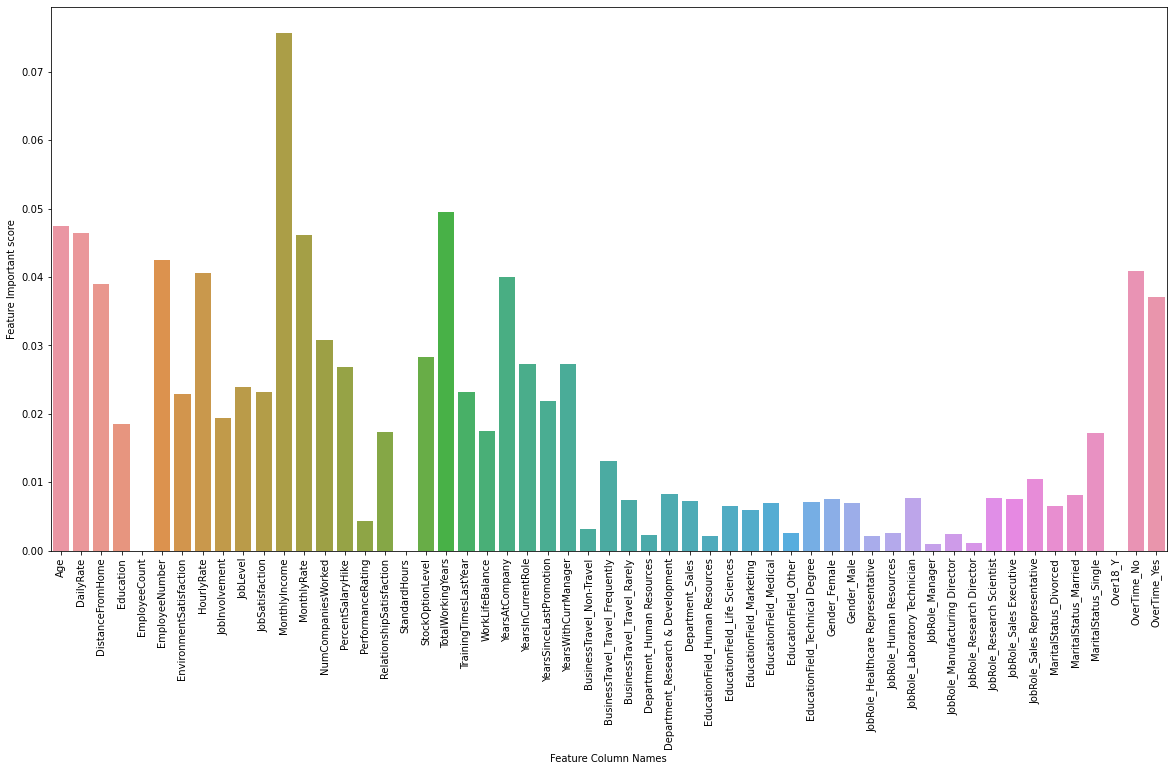

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(x=X.columns, y=rf.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Feature Column Names')
plt.ylabel('Feature Important score')

#### Step8 [Visuallize your RF Decision Tree using graphviz]

In [32]:
estimator = rf.estimators_[5]

In [33]:
from sklearn import tree
from sklearn.tree import export_graphviz

In [34]:
with open("RFDT.dot",'w') as f:
    f = tree.export_graphviz(estimator, out_file = f, max_depth = 4, impurity=False, feature_names = X.columns.values,
        class_names=['Yes', 'No'], filled=True)

In [35]:
!type RFDT.dot

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="JobLevel <= 1.5\nsamples = 758\nvalue = [981, 195]\nclass = Yes", fillcolor="#ea9a60"] ;
1 [label="OverTime_Yes <= 0.5\nsamples = 298\nvalue = [321, 138]\nclass = Yes", fillcolor="#f0b78e"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="YearsSinceLastPromotion <= 1.5\nsamples = 204\nvalue = [255, 48]\nclass = Yes", fillcolor="#ea995e"] ;
1 -> 2 ;
3 [label="MaritalStatus_Single <= 0.5\nsamples = 154\nvalue = [178, 43]\nclass = Yes", fillcolor="#eb9f69"] ;
2 -> 3 ;
4 [label="MonthlyRate <= 18201.5\nsamples = 97\nvalue = [128, 12]\nclass = Yes", fillcolor="#e78d4c"] ;
3 -> 4 ;
5 [label="(...)", fillcolor="#C0C0C0"] ;
4 -> 5 ;
22 [label="(...)", fillcolor="#C0C0C0"] ;
4 -> 22 ;
35 [label="JobRole_Research Scientist <= 0.5\nsamples = 57\nvalue = [50, 31]\nclass = Yes", fillcolor="#f5cfb4"] ;
3 -> 35 ;
36 [label="(...)", fillcolor="#C0C0C0"

In [36]:
# website:- http://www.webgraphviz.com/

#### Step9 [RF with a range of trees]

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
rf2 = RandomForestClassifier(oob_score=True, random_state=42, warm_start=True, n_jobs=-1)

In [39]:
oob_list = list()
# Iterate through all of the possibilities for number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
  rf2.set_params(n_estimators=n_trees)
  rf2.fit(X_train, y_train)
  oob_error = 1-rf2.oob_score_
  oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))
rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
rf_oob_df

,oob
n_trees,
15.0,0.163265
20.0,0.159014
30.0,0.148810
40.0,0.144558
50.0,0.139456
100.0,0.140306
150.0,0.138605
200.0,0.140306
300.0,0.137755


#### Step10 [Plot oob-error for each tree]

[Text(0, 0.5, 'out-of-bag error')]

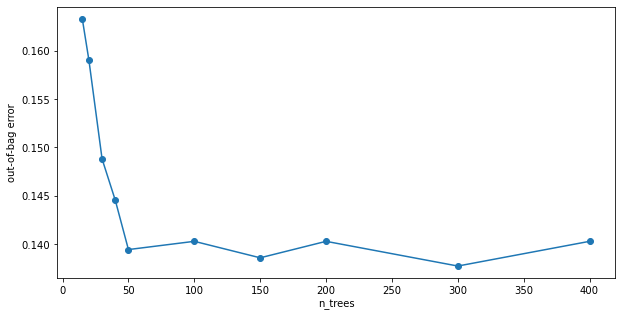

In [40]:
ax = rf_oob_df.plot(legend=False, marker='o', figsize=(10,5))
ax.set(ylabel='out-of-bag error')

#### Step11 [Compare with DecisionTreeClassifier]

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [42]:
dt_ypred = dt.predict(X_test)

In [43]:
accuracy_score(y_test,dt_ypred)

0.7789115646258503

In [44]:
print(classification_report(y_test,dt_ypred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       255
           1       0.20      0.23      0.22        39

    accuracy                           0.78       294
   macro avg       0.54      0.55      0.54       294
weighted avg       0.79      0.78      0.78       294



In [45]:
#Result of Comparison between RF and DT models

In [46]:
print('RF model accuracy:',accuracy_score(y_test,y_pred))
print('DT model accuracy:',accuracy_score(y_test,dt_ypred))

RF model accuracy: 0.8809523809523809
DT model accuracy: 0.7789115646258503


In [47]:
# Classification reports

In [48]:
print(classification_report(y_test,y_pred))   # RF model

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       1.00      0.10      0.19        39

    accuracy                           0.88       294
   macro avg       0.94      0.55      0.56       294
weighted avg       0.90      0.88      0.84       294



In [49]:
print(classification_report(y_test,dt_ypred))  # DT model

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       255
           1       0.20      0.23      0.22        39

    accuracy                           0.78       294
   macro avg       0.54      0.55      0.54       294
weighted avg       0.79      0.78      0.78       294

